In [273]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import seaborn as sns
import math
from operator import itemgetter
import matplotlib.ticker as ticker

In [50]:
df = pd.read_fwf('D:\Downloads\Clone\Data Visualization\Homework_sampledata1.txt', sep = '\s+')
df = df.set_index('2008')
months = [date(2008,m,1).strftime('%b') for m in range(1,13)]
df.columns = months
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,,,,,,,,,,,,
1,10.5,7.3,10.8,18.2,20.0,25.3,27.2,25.1,25.8,23.0,24.9,12.6
2,9.8,10.4,10.7,18.0,25.4,24.8,26.6,26.1,26.7,23.5,20.9,13.9
3,10.7,11.0,11.7,18.8,25.4,26.5,27.4,25.8,25.1,24.5,20.4,17.7
4,15.1,12.9,12.4,20.4,26.5,25.2,27.2,25.3,26.0,23.0,23.1,20.5
5,13.5,11.4,16.0,22.4,24.0,26.0,26.2,26.2,23.5,22.7,22.5,16.7
6,16.0,11.0,16.7,23.6,24.0,26.2,25.5,26.4,24.6,22.8,23.8,17.6
7,15.8,10.3,17.1,23.6,25.1,27.8,25.0,25.0,24.7,24.4,19.6,16.4
8,15.8,12.1,16.9,26.4,25.1,24.8,25.8,26.3,25.3,24.1,18.5,12.7
9,18.0,11.7,17.8,23.8,22.5,26.2,25.6,24.3,22.7,24.0,17.2,12.6


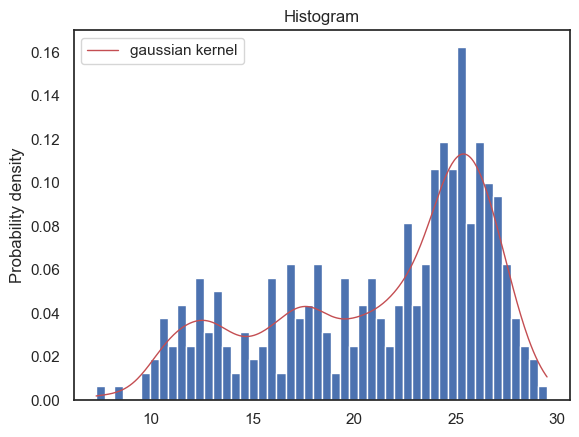

In [51]:
df = df.replace(-99.0, np.nan)
df_list = [df[i] for i in df.columns]
df_list = list(df_list)
flatten = [item for sublist in df_list for item in sublist]
new_flatten = [i for i in flatten if math.isnan(i) == False]

plt.figure()
plt.hist(new_flatten,50,range=(min(new_flatten),max(new_flatten)), density = True)
plt.title('Histogram')
plt.ylabel('Probability density')

kde = KernelDensity(kernel = 'gaussian', bandwidth = 1).fit(np.array(new_flatten).reshape(-1,1))
x_axis = np.linspace(np.min(new_flatten), np.max(new_flatten), 361)
log_dens = kde.score_samples(x_axis.reshape(-1,1))

plt.plot(x_axis, np.exp(log_dens),color='r',lw=1,linestyle='-',label='gaussian kernel')
plt.xticks([10,15,20,25,30])
plt.ylim((0,0.17))
plt.legend()
plt.show()

Text(0.5, 0, 'Times')

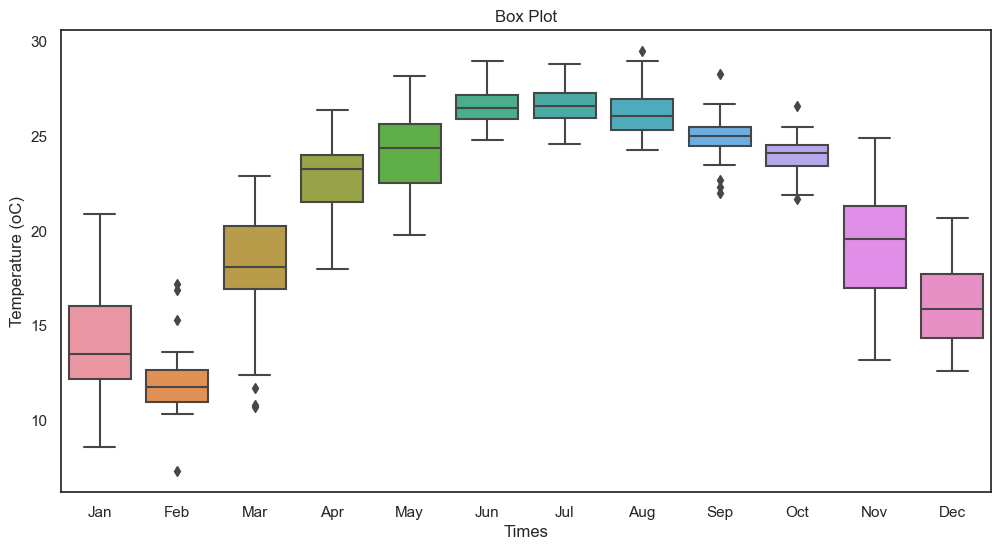

In [52]:
fig,ax = plt.subplots(figsize = (12,6))
fig = sns.boxplot(df, ax=ax)
ax.set_xticklabels(labels = df.columns)
ax.set_title('Box Plot')
ax.set_ylabel('Temperature (oC)')
ax.set_xlabel('Times')

In [53]:
mean= [np.nanmean(df_list[i].tolist()) for i in range(len(df_list))]
std= [np.nanstd(df_list[i].tolist()) for i in range(len(df_list))]
subtract = list(map(lambda a, b: a - b, mean,std))
add = list(map(lambda a, b: a + b, mean,std))
add

[17.386703969868343,
 14.00969221108806,
 21.27685454468131,
 24.70627447408836,
 26.357877296062696,
 27.49383218779071,
 27.618835105224015,
 27.509182018520647,
 26.1363770127843,
 25.158059758292058,
 22.228321582980957,
 18.258429760863145]

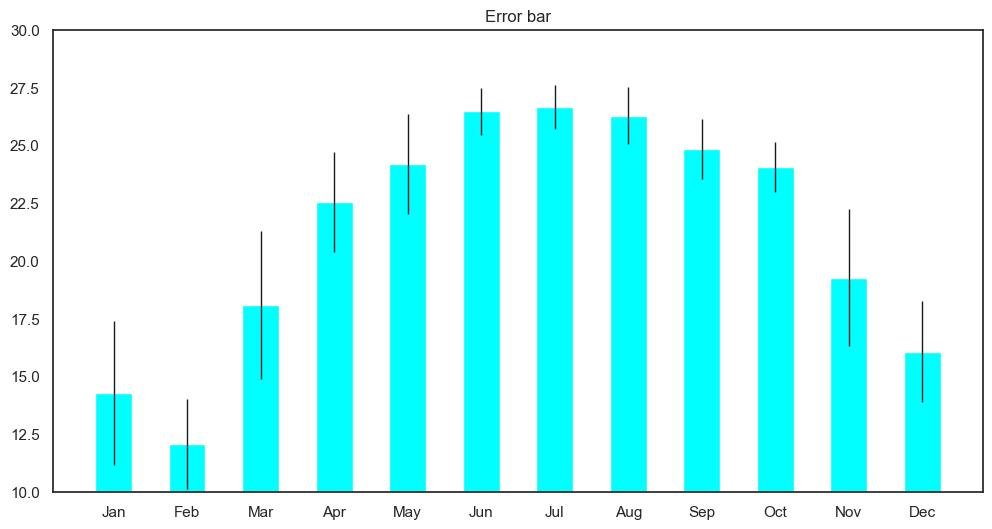

In [54]:
plt.figure(figsize=(12,6))
plt.bar(months,mean,width = 0.5, color = 'aqua')

plt.vlines(months, subtract, add,color='k', linestyle='-', lw=1)
plt.ylim((10,30))
plt.title('Error bar')
plt.show()

In [55]:
new_list = []
for i in range(len(df_list)):
    withou_nan = [x for x in df_list[i] if not math.isnan(x)]
    new_list.append(withou_nan)
len(new_list)

12

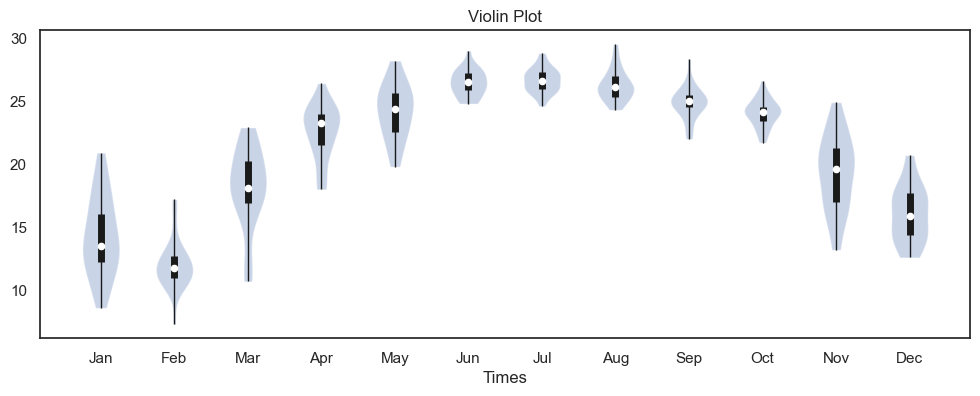

In [56]:
plt.figure(figsize=(12,4))
plt.violinplot(new_list,showmeans = False,showmedians=False,showextrema=False)

for i in range(len(new_list)):
    plt.vlines(i+1,np.percentile(new_list[i],25), np.percentile(new_list[i],75), color = 'k', linestyle= '-', lw=5)
    plt.vlines(i+1,np.min(new_list[i]), np.max(new_list[i]), color = 'k', linestyle = '-', lw = 1)
    plt.scatter(i+1,np.median(new_list[i]), marker = 'o', color = 'white', s= 20,zorder=3)
plt.xticks(range(1,13),df.columns)
plt.title('Violin Plot')
plt.xlabel('Times')
plt.show()

In [57]:
with open('D:\Downloads\Clone\Data Visualization\HW2_literature_score.txt', 'r') as f:
    col_1 = []
    col_2 = []
    lines = [line.strip() for line in f if line]
    for line in lines:
        sline = line.split(' ')
        col_1.append(float(sline[0]))
        col_2.append(float(sline[1]))

student_id = [i+1 for i in range(len(col_1))]
literature = dict(zip(student_id, zip(col_1,col_2)))
literature

{1: (0.4704772184457087, 0.4019778859151365),
 2: (0.4757431278816473, 0.2693791788909508),
 3: (0.21729721962733187, 0.320505198441375),
 4: (0.3311396953236662, 0.45391425735759083),
 5: (0.5350711683314091, 0.3314603528679057),
 6: (0.3086693126267346, 0.5262435758632853),
 7: (0.5509934556534188, 0.3233822445258821),
 8: (0.6354871958166165, 0.2334702673959359),
 9: (0.21980198193401565, 0.1781240228472164),
 10: (0.298940087894391, 0.07109031946389556),
 11: (0.3035425198829478, 0.0708728086330481),
 12: (0.42993588361068474, 0.491805629218943),
 13: (0.4893137624898449, 0.2920642811491708),
 14: (0.14844636195806618, 0.2038941519297053),
 15: (0.528625886475898, 0.6642593441964383),
 16: (0.6106218528378492, 0.604583016272331),
 17: (0.36732583731002116, 0.6195641990373547),
 18: (0.7147006285104621, 0.36913831875256076),
 19: (0.5691102178331778, 0.26190066215790275),
 20: (0.08101869026036441, 0.11356011383719353),
 21: (0.30506860330377567, 0.07385272335904913),
 22: (0.303839

In [13]:
for key,value in literature.items():
    literature[key] = list(literature[key])
    literature[key].append(value[0]*0.4 + value[1]*0.6)
print(literature)

{1: [0.4704772184457087, 0.4019778859151365, 0.42937761892736537], 2: [0.4757431278816473, 0.2693791788909508, 0.3519247584872294], 3: [0.21729721962733187, 0.320505198441375, 0.2792220069157577], 4: [0.3311396953236662, 0.45391425735759083, 0.404804432544021], 5: [0.5350711683314091, 0.3314603528679057, 0.4129046790533071], 6: [0.3086693126267346, 0.5262435758632853, 0.439213870568665], 7: [0.5509934556534188, 0.3233822445258821, 0.4144267289768968], 8: [0.6354871958166165, 0.2334702673959359, 0.39427703876420817], 9: [0.21980198193401565, 0.1781240228472164, 0.1947952064819361], 10: [0.298940087894391, 0.07109031946389556, 0.16223022683609375], 11: [0.3035425198829478, 0.0708728086330481, 0.16394069313300796], 12: [0.42993588361068474, 0.491805629218943, 0.4670577309756397], 13: [0.4893137624898449, 0.2920642811491708, 0.3709640736854405], 14: [0.14844636195806618, 0.2038941519297053, 0.18171503594104965], 15: [0.528625886475898, 0.6642593441964383, 0.6100059611082222], 16: [0.610621

In [14]:
literature = dict(sorted(literature.items(), key=lambda x:x[1][-1], reverse = True))
literature

{27: [0.5105106639990312, 0.7245214159274675, 0.6389171151560931],
 26: [0.5666496124519936, 0.6428340441535053, 0.6123602714729006],
 15: [0.528625886475898, 0.6642593441964383, 0.6100059611082222],
 16: [0.6106218528378492, 0.604583016272331, 0.6069985508985383],
 29: [0.669970246667655, 0.535160198091031, 0.5890842175216806],
 28: [0.4039451401243522, 0.663440006396444, 0.5596420598876073],
 38: [0.340699807215872, 0.660939246487758, 0.5328434707790036],
 39: [0.568609458641662, 0.4962639938022561, 0.5252021797380184],
 17: [0.36732583731002116, 0.6195641990373547, 0.5186688543464213],
 45: [0.580339593317075, 0.4666385350338311, 0.5121189583471286],
 18: [0.7147006285104621, 0.36913831875256076, 0.5073632426557213],
 41: [0.4182040157878399, 0.5568496764653612, 0.5013914121943527],
 37: [0.3501568730034297, 0.562167162485558, 0.4773630466927067],
 12: [0.42993588361068474, 0.491805629218943, 0.4670577309756397],
 35: [0.5970154998011585, 0.3652540519506044, 0.457958631090826],
 34:

In [13]:
import plotly.graph_objects as go
fig = go.Figure(go.Bar(x = list(literature.values()), y=list(literature.keys()),orientation='h'))
fig.show()

In [242]:
def calculate_score(path):
    with open(path, 'r') as f:
        col_1 = []
        col_2 = []
        lines = [line.strip() for line in f if line]
        for line in lines:
            sline = line.split(' ')
            col_1.append(float(sline[0]))
            col_2.append(float(sline[1]))
    return [col_1,col_2]

literature_score = calculate_score('D:\Downloads\Clone\Data Visualization\HW2_literature_score.txt')
math_score = calculate_score('D:\Downloads\Clone\Data Visualization\HW2_math_score.txt')

In [243]:
final_score = []
for i in range(len(literature_score[0])):
    score = {
        'id': i + 1,
        'literature_mid': literature_score[0][i]*0.4,
        'literature_final': literature_score[1][i]*0.6,
        'literature_score': literature_score[0][i]*0.4 + literature_score[1][i]*0.6,
        'math_mid':math_score[0][i]*0.4,
        'math_final':math_score[1][i]*0.6,
        'math_score': math_score[0][i]*0.4 + math_score[1][i]*0.6,
        'average_score': ((literature_score[0][i]*0.4 + literature_score[1][i]*0.6) + (math_score[0][i]*0.4 + math_score[1][i]*0.6))/2
    }
    final_score.append(score)
final_score

[{'id': 1,
  'literature_mid': 0.1881908873782835,
  'literature_final': 0.24118673154908188,
  'literature_score': 0.42937761892736537,
  'math_mid': 0.13830070069157693,
  'math_final': 0.30691069850544167,
  'math_score': 0.4452113991970186,
  'average_score': 0.43729450906219197},
 {'id': 2,
  'literature_mid': 0.19029725115265894,
  'literature_final': 0.16162750733457049,
  'literature_score': 0.3519247584872294,
  'math_mid': 0.12395944400791942,
  'math_final': 0.24484152605950632,
  'math_score': 0.36880097006742574,
  'average_score': 0.36036286427732755},
 {'id': 3,
  'literature_mid': 0.08691888785093276,
  'literature_final': 0.19230311906482497,
  'literature_score': 0.2792220069157577,
  'math_mid': 0.07731708760043415,
  'math_final': 0.07428388413766375,
  'math_score': 0.1516009717380979,
  'average_score': 0.2154114893269278},
 {'id': 4,
  'literature_mid': 0.1324558781294665,
  'literature_final': 0.27234855441455447,
  'literature_score': 0.404804432544021,
  'math

In [244]:
sorted_literature = sorted(final_score, key = itemgetter('literature_score'), reverse = True)
sorted_math = sorted(final_score, key = itemgetter('math_score'), reverse = True)
sorted_final = sorted(final_score, key = itemgetter('average_score'), reverse = True)

In [245]:
top_student = []
for i in range(10):
    top_student.append(sorted_final[i]['id'])
top_student

[15, 27, 26, 29, 39, 28, 18, 41, 38, 12]

In [246]:
literature_id = np.ravel([sorted_literature[i]['id'] for i in range(len(sorted_literature))])
literature_mid = np.ravel([sorted_literature[i]['literature_mid'] for i in range(len(sorted_literature))])
literature_final = np.ravel([sorted_literature[i]['literature_final'] for i in range(len(sorted_literature))])

math_id = np.ravel([sorted_math[i]['id'] for i in range(len(sorted_math))])
math_mid = np.ravel([sorted_math[i]['math_mid'] for i in range(len(sorted_math))])
math_final = np.ravel([sorted_math[i]['math_final'] for i in range(len(sorted_math))])

final_lit_mid = np.ravel([sorted_final[i]['literature_mid']/2 for i in range(len(sorted_final))])
final_lit = np.ravel([sorted_final[i]['literature_final']/2 for i in range(len(sorted_final))])
final_math_mid = np.ravel([sorted_final[i]['math_mid']/2 for i in range(len(sorted_final))])
final_math = np.ravel([sorted_final[i]['math_final']/2 for i in range(len(sorted_final))])
fin_sum = np.ravel([sorted_final[i]['average_score'] for i in range(len(sorted_final))])
final_id = np.ravel([sorted_final[i]['id'] for i in range(len(sorted_final))])

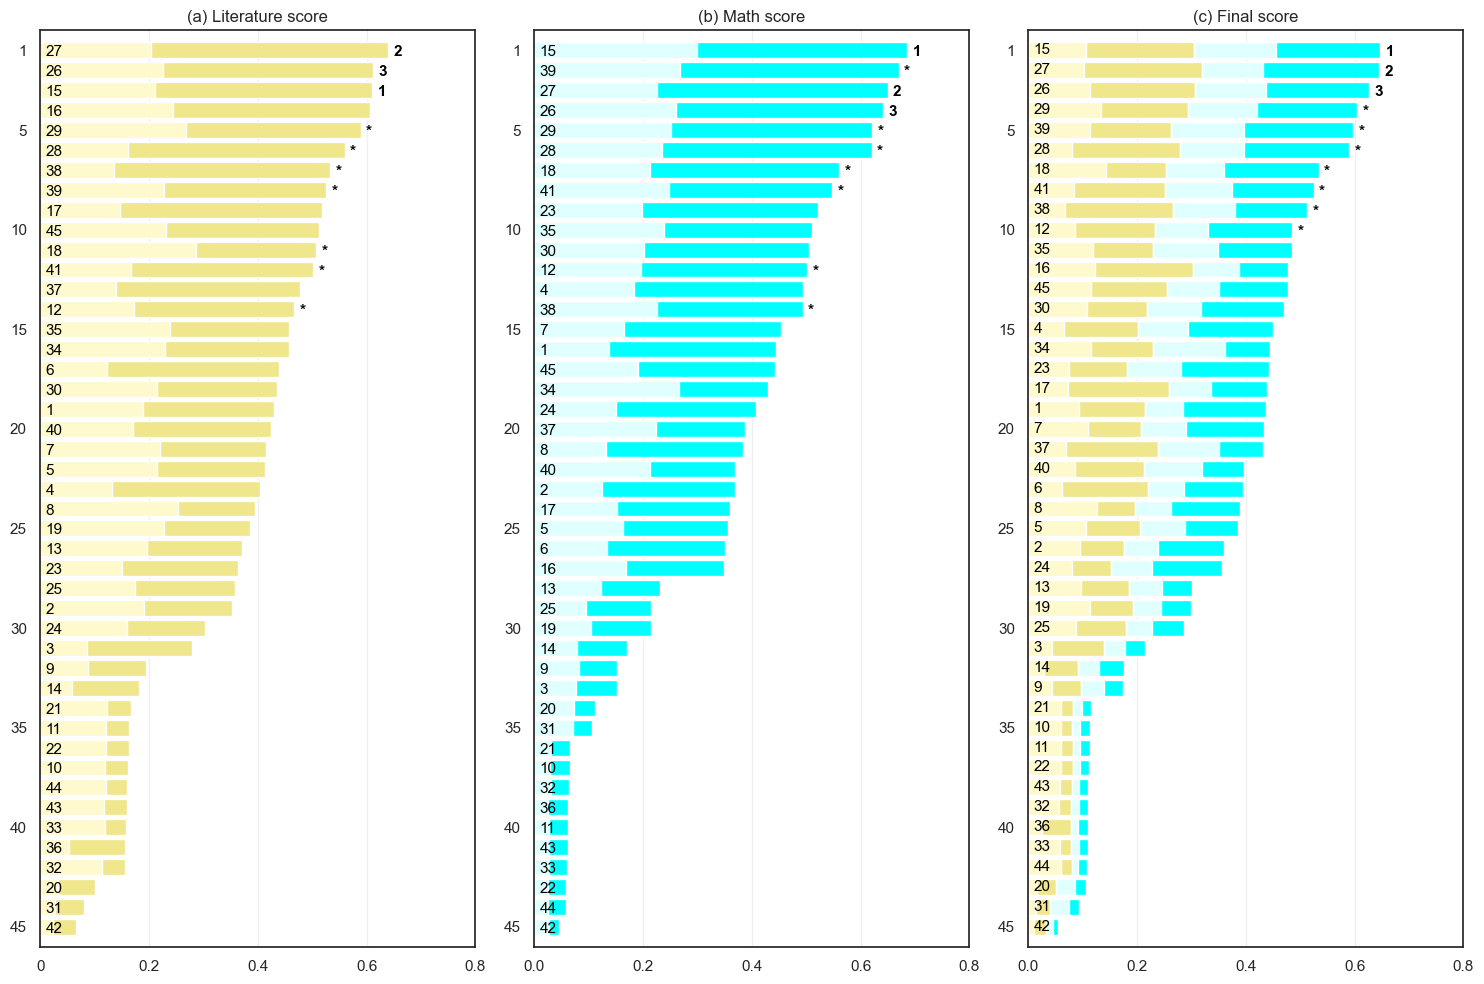

In [287]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,10))

#first subplot
for i, j in enumerate(literature_id):
    ax1.barh(i+1,literature_mid[i], color = 'lemonchiffon')
    ax1.barh(i+1,literature_final[i], color = 'khaki', left = literature_mid[i])
    ax1.text(0.01, i + 1.3, j, size=11, color='black')
    if (j in top_student[:3]):
        index = top_student.index(j)
        ax1.text(literature_mid[i] + literature_final[i] + 0.01, i+1.3, index+1, color = 'black', size=11, fontweight='bold')
    if (j in top_student[3:]):
        ax1.text(literature_mid[i] + literature_final[i] + 0.01, i+1.3, '*', color = 'black', size=11,fontweight='bold')
ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8])
ax1.set_yticks([1, 5, 10, 15, 20, 25, 30, 35, 40, 45])
ax1.set_yticklabels([1, 5, 10, 15, 20, 25, 30, 35, 40, 45])
ax1.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8])
ax1.grid(axis='x', alpha=0.3)
ax1.set_ylim(0, 46)
ax1.set_xlim(0,0.8)
ax1.set_title('(a) Literature score')
ax1.invert_yaxis()

#2nd subplot
for i, j in enumerate(math_id):
    ax2.barh(i+1,math_mid[i], color = 'lightcyan')
    ax2.barh(i+1,math_final[i], color = 'cyan', left = math_mid[i])
    ax2.text(0.01, i + 1.3, j, size=11, color='black')
    if (j in top_student[:3]):
        index = top_student.index(j)
        ax2.text(math_mid[i] + math_final[i] + 0.01, i+1.3, index+1, color = 'black', size=11,fontweight='bold')
    if (j in top_student[3:]):
        ax2.text(math_mid[i] + math_final[i] + 0.01, i+1.3, '*', color = 'black', size=11,fontweight='bold')
ax2.set_xticks([0, 0.2, 0.4, 0.6, 0.8])
ax2.set_yticks([1, 5, 10, 15, 20, 25, 30, 35, 40, 45])
ax2.grid(axis='x', alpha=0.3)
ax2.grid(axis='y', which='both', linestyle='-', linewidth=0)
ax2.set_ylim(0, 46)
ax2.set_xlim(0,0.8)
ax2.set_title('(b) Math score')
ax2.invert_yaxis()

#3rd subplot
for i, j in enumerate(final_id):
    ax3.barh(i+1,final_lit_mid[i], color = 'lemonchiffon')
    ax3.barh(i+1,final_lit[i], color = 'khaki', left = final_lit_mid[i])
    ax3.barh(i+1,final_math_mid[i], color = 'lightcyan', left=final_lit[i]+final_lit_mid[i])
    ax3.barh(i+1,final_math[i], color = 'cyan', left = final_lit[i]+final_lit_mid[i]+final_math_mid[i])
    ax3.text(0.01, i + 1.3, j, size=11, color='black')
    if (j in top_student[:3]):
        ax3.text(final_lit[i]+final_lit_mid[i]+final_math_mid[i]+final_math[i] + 0.01, i+1.3, i+1, color = 'black', size=11,fontweight='bold')
    if (j in top_student[3:]):
        ax3.text(final_lit[i]+final_lit_mid[i]+final_math_mid[i]+final_math[i] + 0.01, i+1.3, '*', color = 'black', size=11,fontweight='bold')
ax3.set_xticks([0, 0.2, 0.4, 0.6, 0.8])
ax3.set_yticks([1, 5, 10, 15, 20, 25, 30, 35, 40, 45])
ax3.grid(axis='x', alpha=0.3)
ax3.grid(axis='y', which='both', linestyle='-', linewidth=0)
ax3.set_ylim(0, 46)
ax3.set_xlim(0,0.8)
ax3.set_title('(c) Final score')
ax3.invert_yaxis()

plt.tight_layout()
plt.show()